#### Step 1. 스티커 구하기 or 만들기
---
- 고양이 수염 이미지
![고양이 수염 이미지](cat-whiskers.png)

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.



In [1]:
# 주요 라이브러리 버전을 확인해 보고 시작 (cv2 : 4.5.3, dlib : 19.22.1)
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


#### Step 2. 얼굴 검출 & 랜드마크 검출 하기
---
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.



rectangles[[(82, 171) (349, 439)]]
/aiffel
68


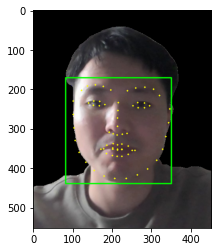

In [2]:
import matplotlib.pyplot as plt
# 준비한 이미지를 읽기
my_image_path = 'image.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() 

# 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image pyramid index : Gaussian Pyramids 와 Laplacian Pyramids)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

# cf. !cd ~
%cd ~
# 직전 프로젝트에서 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
landmark_predictor = dlib.shape_predictor(model_path)
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_rgb, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장 (points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있음)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)
    
# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
print(len(list_landmarks[0]))

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
# RGB 이미지로 전환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지를 준비
plt.imshow(img_show_rgb)
# 이미지를 출력
plt.show()

#### Step 3. 스티커 적용 위치 확인하기
---
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

![?](E-8-8.png)
코 끝인 33 번보다 좋은 위치가 있을 거예요.



In [3]:
import os
# 고양이 수염 이미지 분석-1
sticker_path = os.getenv('HOME')+'/aiffel/cat-whiskers_dlib/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # image객체 행렬을 반환
# img_sticker = cv2.resize(img_sticker, (w,h)) # cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape)

(512, 512, 3)


In [4]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(82, 171) (349, 439)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(101, 230), (101, 264), (103, 298), (106, 330), (116, 360), (133, 385), (154, 406), (179, 420), (206, 426), (235, 426), (263, 417), (289, 402), (312, 380), (327, 352), (335, 320), (342, 285), (345, 250), (122, 203), (137, 192), (157, 189), (177, 193), (196, 202), (238, 204), (259, 197), (282, 195), (304, 200), (319, 216), (215, 234), (214, 254), (213, 273), (213, 294), (192, 309), (202, 313), (212, 316), (225, 314), (237, 312), (140, 235), (153, 230), (168, 231), (181, 239), (167, 242), (152, 241), (252, 242), (264, 234), (281, 235), (294, 242), (281, 247), (265, 247), (171, 352), (186, 342), (202, 338), (213, 341), (224, 339), (240, 344), (257, 355), (240, 365), (224, 370), (212, 370), (200, 368), (185, 363), (178, 351), (201, 349), (213, 352), (224, 352), (250, 355), (224, 353), (213, 354), (201, 352)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]# - dlib_rect.height()//2
    w = h = dlib_rect.width() # max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(213, 294)
(x,y) : (213,294)
(w,h) : (268,268)


In [5]:
# 고양이 수염 이미지 분석-2
img_sticker = cv2.resize(img_sticker, (w,h)) # cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape)

(268, 268, 3)


#### Step 4. 스티커 적용하기
___
(1) 오늘 배운 ```np.where``` 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 ```cv2.addWeighted()``` 를 참고하세요.



(x,y) : (79,160)
(x,y) : (79,160)
슝~


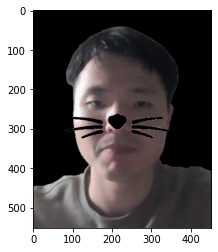

interactive(children=(IntSlider(value=50, description='Weight:'), Output()), _dom_classes=('widget-interact',)…

In [6]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 213
# y는 이미지에서 코 부위의 y값 = 294
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 268
# h는 얼굴 영역의 세로를 차지하는 픽셀의 수 = 268
refined_x = x - w // 2 # 213 - (268//2) = 213-134 = 79
refined_y = y - h // 2 # 294-(268//2) = 294-134 = 160
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지의 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 고양이 수염 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생x : 이미지 범위를 벗어남x
# 우리는 현재 코 부위에 왕관은 두고 싶은건데, 코위치 - 고양이 수염 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것x
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 x잘라 줘야 한다.

# 고양이 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함x
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop x하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 고양이 수염 이미지(혹은 추후 적용할 스티커 이미지)를 x자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 고양이 수염 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이x므로, img_sticker[98: , :]가 x된다. (187, 187, 3)에서 (89, 187, 3)이 x됨 (187개 중에서 98개가 x잘려나감)
    refined_y = 0

print(f'(x,y) : ({refined_x},{refined_y})')

import numpy as np
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (79,160) 부터 (79+268, 160+268) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[160:160+268, 79:79+268]
# img_show[160:428, 79:347]
# 즉, x좌표는 79~347 / y좌표는 160~428가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# x왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# x왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.-? : 이미지가 미리 처리되어 배경이 검은색(0, 0, 0)으로 설정됨
# x현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# x그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# xsticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# x즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# x나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# x아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# x나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

# 고양이 수염 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
# plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# plt.show()

# 위에서 설명했으므로 생략
# 고양이 수염 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 수염 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봄
from ipywidgets import interact
import ipywidgets as widgets
# import cv2
# import matplotlib.pyplot as plt

# 원본 이미지 불러오기
img_bgr = cv2.imread(my_image_path)
# 전체 이미지 크기에 맞는 스티커 이미지 생성
full_sticker = np.zeros_like(img_bgr)
full_sticker[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = img_sticker

# 스티커 이미지가 정의되어 있는지 확인
# img_sticker 변수가 제대로 정의되어 있어야 합니다

@interact(weight_value=widgets.IntSlider(min=0, max=100, step=1, value=50, description='Weight:'))
def update_image(weight_value):
    # 이미지 합성
    blended_img = cv2.addWeighted(img_bgr, float(100-weight_value) * 0.01, 
                                 full_sticker, float(weight_value) * 0.01, 0)
    
    # matplotlib으로 결과 표시
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(blended_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

ㅎ~ㅎ~, 결국 마스크맨이 되버렸다.
#### Step 5. 문제점 찾아보기
---
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!



>오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.
>
>
>- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요? → 상하로는 rotation, 좌우로는 orthogonal projection해야 한다.
>- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요? → 픽셀이 담고 있는 공간이 한계가 있어 landmark 모델에게 필요한 정보량을 가지지 못할 수 있다. 그래서 얼굴이라 제대로 인식이 안될 수도 있다.
>- 실행 속도가 중요할까요? → 모델의 퍼모먼스를 결정해서 성능에서 차이가 날 거다. 사진에 있는 여러 얼굴을 탐지할 수 있지만, 실행 속도가 느리면 여러 얼굴의 탐지가 잘 안 될 수 있다.
>- 스티커앱을 만들 때 정확도가 얼마나 중요할까요? → 많이 중요하다고 생각한다. 조금만 어긋나도 불편한 골짜기(uncanny valley)처럼 느껴질 거다.

모델 로드 시도: aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat
모델 로드 성공: aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat


  0%|          | 1/360 [00:00<01:02,  5.78it/s]

(213, 213, 3)
(x,y) : (107,188)
조정 후 (x,y) : (107,188)
고양이 수염 적용 완료!


  1%|          | 2/360 [00:00<01:03,  5.62it/s]

(213, 213, 3)
(x,y) : (112,185)
조정 후 (x,y) : (112,185)
고양이 수염 적용 완료!


  1%|▏         | 5/360 [00:00<01:06,  5.36it/s]

(214, 214, 3)
(x,y) : (123,197)
조정 후 (x,y) : (123,197)
고양이 수염 적용 완료!


  2%|▏         | 6/360 [00:01<01:07,  5.22it/s]

(214, 214, 3)
(x,y) : (127,204)
조정 후 (x,y) : (127,204)
고양이 수염 적용 완료!


  2%|▏         | 7/360 [00:01<01:09,  5.06it/s]

(214, 214, 3)
(x,y) : (131,206)
조정 후 (x,y) : (131,206)
고양이 수염 적용 완료!


  2%|▏         | 8/360 [00:01<01:11,  4.94it/s]

(214, 214, 3)
(x,y) : (135,208)
조정 후 (x,y) : (135,208)
고양이 수염 적용 완료!


  3%|▎         | 11/360 [00:02<01:15,  4.63it/s]

(214, 214, 3)
(x,y) : (148,218)
조정 후 (x,y) : (148,218)
고양이 수염 적용 완료!


  3%|▎         | 12/360 [00:02<01:16,  4.52it/s]

(214, 214, 3)
(x,y) : (151,218)
조정 후 (x,y) : (151,218)
고양이 수염 적용 완료!


  4%|▎         | 13/360 [00:02<01:19,  4.39it/s]

(214, 214, 3)
(x,y) : (154,222)
조정 후 (x,y) : (154,222)
고양이 수염 적용 완료!


  7%|▋         | 25/360 [00:05<01:34,  3.54it/s]

(213, 213, 3)
(x,y) : (194,246)
조정 후 (x,y) : (194,246)
고양이 수염 적용 완료!


  7%|▋         | 26/360 [00:06<01:36,  3.47it/s]

(213, 213, 3)
(x,y) : (196,248)
조정 후 (x,y) : (196,248)
고양이 수염 적용 완료!


  8%|▊         | 27/360 [00:06<01:37,  3.42it/s]

(213, 213, 3)
(x,y) : (201,248)
조정 후 (x,y) : (201,248)
고양이 수염 적용 완료!


  8%|▊         | 28/360 [00:06<01:38,  3.37it/s]

(213, 213, 3)
(x,y) : (203,248)
조정 후 (x,y) : (203,248)
고양이 수염 적용 완료!


  8%|▊         | 29/360 [00:07<01:39,  3.33it/s]

(213, 213, 3)
(x,y) : (205,249)
조정 후 (x,y) : (205,249)
고양이 수염 적용 완료!


 92%|█████████▎| 333/360 [01:31<00:08,  3.15it/s]

(214, 214, 3)
(x,y) : (219,271)
조정 후 (x,y) : (219,271)
고양이 수염 적용 완료!


 93%|█████████▎| 334/360 [01:32<00:08,  3.16it/s]

(214, 214, 3)
(x,y) : (216,268)
조정 후 (x,y) : (216,268)
고양이 수염 적용 완료!


 98%|█████████▊| 354/360 [01:37<00:01,  4.52it/s]

(214, 214, 3)
(x,y) : (139,212)
조정 후 (x,y) : (139,212)
고양이 수염 적용 완료!


 99%|█████████▊| 355/360 [01:37<00:01,  4.60it/s]

(214, 214, 3)
(x,y) : (135,211)
조정 후 (x,y) : (135,211)
고양이 수염 적용 완료!


 99%|█████████▉| 357/360 [01:37<00:00,  4.85it/s]

(214, 214, 3)
(x,y) : (130,206)
조정 후 (x,y) : (130,206)
고양이 수염 적용 완료!


100%|██████████| 360/360 [01:38<00:00,  3.66it/s]


(213, 213, 3)
(x,y) : (112,192)
조정 후 (x,y) : (112,192)
고양이 수염 적용 완료!
총 20개의 각도에서 얼굴 검출 성공
검출 성공 각도: [0, 1, 4, 5, 6, 7, 10, 11, 12, 24, 25, 26, 27, 28, 332, 333, 353, 354, 355, 359]


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_

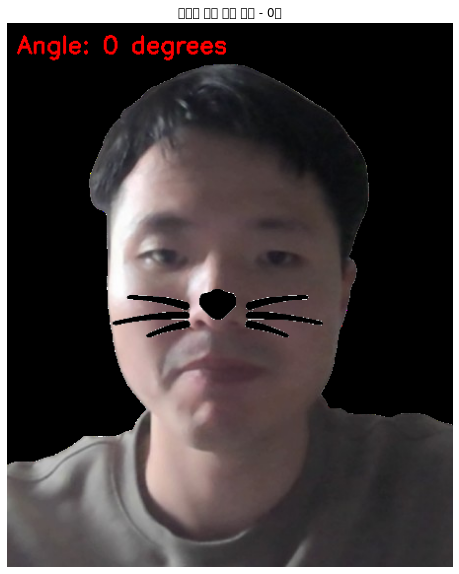

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_

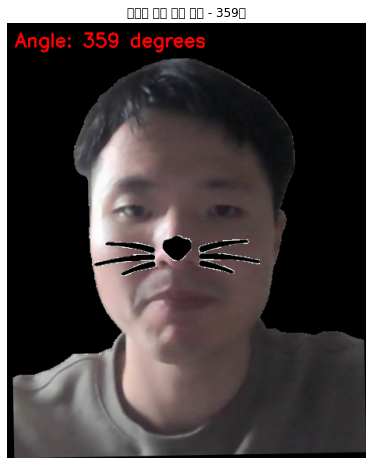

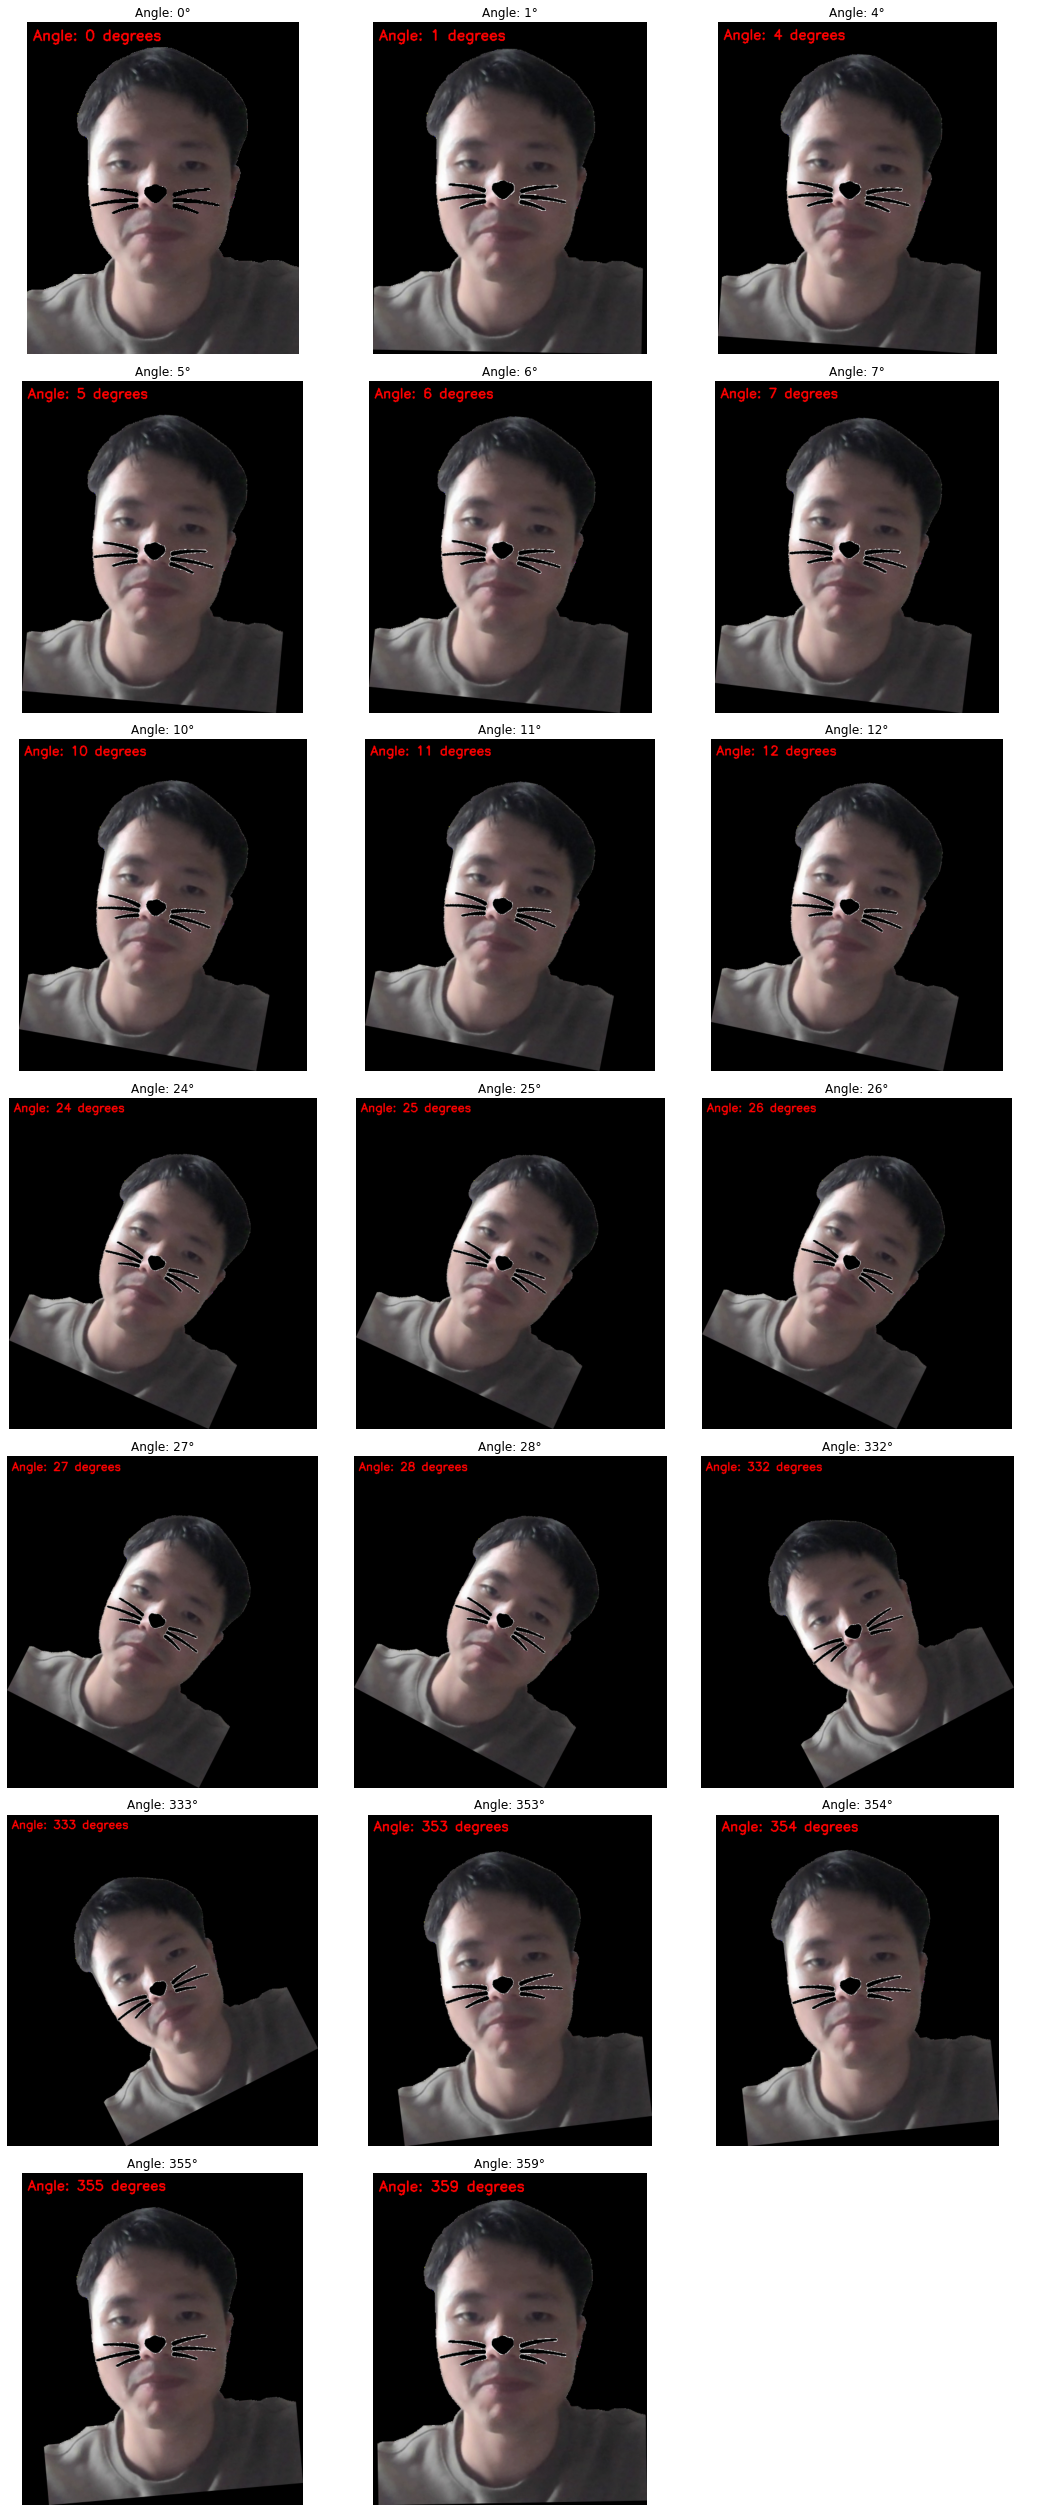

In [7]:
import matplotlib.pyplot as plt
import cv2
import dlib
import numpy as np
from tqdm import tqdm
import matplotlib.animation as animation
from IPython.display import HTML
import os

# 이미지 불러오기
my_image_path = 'image.png'
img_bgr = cv2.imread(my_image_path)

# 고양이 수염 스티커 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/cat-whiskers_dlib/cat-whiskers.png'
cat_sticker = cv2.imread(sticker_path)

if img_bgr is None:
    print(f"이미지를 불러오는데 실패했습니다: {my_image_path}")
elif cat_sticker is None:
    print(f"스티커를 불러오는데 실패했습니다: {sticker_path}")
else:
    # HOG 얼굴 검출기 초기화
    detector_hog = dlib.get_frontal_face_detector()
    
    # 랜드마크 모델 경로 설정
    # 여러 가능한 경로를 시도
    possible_model_paths = [
        'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat',
        os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat',
        os.getenv('HOME')+'/shape_predictor_68_face_landmarks.dat',
        'shape_predictor_68_face_landmarks.dat'
    ]
    
    landmark_predictor = None
    for model_path in possible_model_paths:
        try:
            print(f"모델 로드 시도: {model_path}")
            landmark_predictor = dlib.shape_predictor(model_path)
            print(f"모델 로드 성공: {model_path}")
            break
        except Exception as e:
            print(f"경로 {model_path}에서 랜드마크 모델을 불러오는데 실패했습니다: {e}")
    
    if landmark_predictor is None:
        print("모든 경로에서 랜드마크 모델 로드에 실패했습니다.")
        print("다음 URL에서 모델을 다운로드할 수 있습니다:")
        print("http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2")
        print("다운로드 후 압축을 풀고 현재 작업 디렉토리에 복사하세요.")
    
    # 결과 저장용 리스트
    successful_angles = []
    result_images = []
    
    # 0도부터 360도까지 회전하며 얼굴 검출
    for angle in tqdm(range(0, 360, 1)):
        # 이미지 중심 계산
        height, width = img_bgr.shape[:2]
        center = (width // 2, height // 2)
        
        # 회전 행렬 생성 (시계 방향 회전)
        rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
        
        # 회전된 이미지 경계 계산
        abs_cos = abs(rotation_matrix[0, 0])
        abs_sin = abs(rotation_matrix[0, 1])
        new_width = int(height * abs_sin + width * abs_cos)
        new_height = int(height * abs_cos + width * abs_sin)
        
        # 회전 행렬 조정
        rotation_matrix[0, 2] += new_width / 2 - center[0]
        rotation_matrix[1, 2] += new_height / 2 - center[1]
        
        # 이미지 회전
        rotated_img_bgr = cv2.warpAffine(img_bgr, rotation_matrix, (new_width, new_height))
        
        # BGR → RGB 변환
        img_rgb = cv2.cvtColor(rotated_img_bgr, cv2.COLOR_BGR2RGB)
        
        # 얼굴 검출
        dlib_rects = detector_hog(img_rgb, 1)
        
        # 얼굴이 검출된 경우
        if len(dlib_rects) > 0:
            # 결과 이미지 준비
            img_show = rotated_img_bgr.copy()
            
            # 랜드마크 검출 (사각형 그리기 제외)
            list_landmarks = []
            for dlib_rect in dlib_rects:
                try:
                    points = landmark_predictor(img_rgb, dlib_rect)
                    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
                    list_landmarks.append(list_points)
                except Exception as e:
                    print(f"각도 {angle}에서 랜드마크 검출 실패: {e}")
            
            # 고양이 수염 적용 (랜드마크 점 그리기 제외)
            for landmark in list_landmarks:
                
                # 코 부분 랜드마크 (일반적으로 30번 포인트가 코 끝)
                if len(landmark) >= 30:
                    x, y = landmark[30]
                    
                    # 고양이 수염 크기 설정 (얼굴 크기에 비례하게)
                    face_width = dlib_rect.right() - dlib_rect.left()
                    w = int(face_width * 0.8)  # 얼굴 너비의 80%로 수염 크기 설정
                    h = int(w * cat_sticker.shape[0] / cat_sticker.shape[1])  # 비율 유지
                    
                    # 스티커 리사이즈
                    resized_sticker = cv2.resize(cat_sticker.copy(), (w, h))
                    
                    # 스티커를 이미지와 같은 각도로 회전
                    sticker_center = (resized_sticker.shape[1] // 2, resized_sticker.shape[0] // 2)
                    sticker_rotation_matrix = cv2.getRotationMatrix2D(sticker_center, -angle, 1.0)
                    img_sticker = cv2.warpAffine(resized_sticker, sticker_rotation_matrix, 
                                                (resized_sticker.shape[1], resized_sticker.shape[0]),
                                                flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, 
                                                borderValue=(255, 255, 255))
                    print(img_sticker.shape)
                    
                    # 스티커 위치 조정 (코 위치 중심)
                    refined_x = x - w // 2
                    refined_y = y - h // 2
                    print(f'(x,y) : ({refined_x},{refined_y})')
                    
                    # 이미지 범위를 벗어나는 경우 처리
                    if refined_x < 0:
                        img_sticker = img_sticker[:, -refined_x:]
                        refined_x = 0
                    if refined_y < 0:
                        img_sticker = img_sticker[-refined_y:, :]
                        refined_y = 0
                    
                    # 이미지 범위를 벗어나는 경우 (오른쪽, 아래쪽)
                    if refined_x + img_sticker.shape[1] > img_show.shape[1]:
                        img_sticker = img_sticker[:, :img_show.shape[1]-refined_x]
                    if refined_y + img_sticker.shape[0] > img_show.shape[0]:
                        img_sticker = img_sticker[:img_show.shape[0]-refined_y, :]
                    
                    print(f'조정 후 (x,y) : ({refined_x},{refined_y})')
                    
                    # 스티커 영역 추출
                    try:
                        sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
                        
                        # 투명 배경 처리 (255는 하얀색/투명 부분)
                        img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
                            np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
                        print("고양이 수염 적용 완료!")
                    except Exception as e:
                        print(f"스티커 적용 실패: {e}")
            
            # 각도 텍스트 추가
            cv2.putText(img_show, f"Angle: {angle} degrees", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
            
            # 결과 저장
            successful_angles.append(angle)
            img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
            result_images.append(img_show_rgb)
    
    # 결과 요약
    print(f"총 {len(successful_angles)}개의 각도에서 얼굴 검출 성공")
    print(f"검출 성공 각도: {successful_angles}")
    
    # 결과 시각화
    if result_images:
        plt.figure(figsize=(15, 10))
        
        # 가장 많은 랜드마크를 검출한 결과 찾기 (단순화를 위해 첫 번째 이미지 사용)
        plt.imshow(result_images[0])
        plt.title(f"고양이 수염 적용 결과 - {successful_angles[0]}도")
        plt.axis('off')
        plt.show()
        
        # 검출 결과를 애니메이션으로 보여주기
        fig = plt.figure(figsize=(10, 8))
        plt.axis('off')
        
        def init():
            plt.clf()
            plt.axis('off')
            return []
        
        def animate(i):
            plt.clf()
            plt.imshow(result_images[i])
            plt.title(f"고양이 수염 적용 결과 - {successful_angles[i]}도")
            plt.axis('off')
            return []
        
        anim = animation.FuncAnimation(fig, animate, frames=len(result_images),
                                      init_func=init, interval=100, blit=True)
        
        # 애니메이션 표시
        HTML(anim.to_jshtml())
        
        # 스크롤 가능한 그리드 형태로 결과 표시
        n_cols = 3
        n_rows = (len(result_images) + n_cols - 1) // n_cols  # 올림 나눗셈
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
        axes = axes.flatten()
        
        for i, (img, angle) in enumerate(zip(result_images, successful_angles)):
            axes[i].imshow(img)
            axes[i].set_title(f"Angle: {angle}°")
            axes[i].axis('off')
        
        # 남은 축 숨기기
        for i in range(len(result_images), len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("얼굴이 검출된 각도가 없습니다.")

## 참고
___

In [ ]:
import matplotlib.pyplot as plt
import cv2
import dlib
import numpy as np

# 이미지 불러오기
my_image_path = 'image.png'
img_bgr = cv2.imread(my_image_path)

# 이미지를 시계 방향으로 45도 회전
# 이미지 중심 계산
height, width = img_bgr.shape[:2]
center = (width // 2, height // 2)

# 회전 행렬 생성 (시계 방향 회전이므로 각도는 -45)
rotation_matrix = cv2.getRotationMatrix2D(center, -25, 1.0)

# 회전된 이미지 경계 계산
abs_cos = abs(rotation_matrix[0, 0])
abs_sin = abs(rotation_matrix[0, 1])
new_width = int(height * abs_sin + width * abs_cos)
new_height = int(height * abs_cos + width * abs_sin)

# 회전 행렬 조정
rotation_matrix[0, 2] += new_width / 2 - center[0]
rotation_matrix[1, 2] += new_height / 2 - center[1]

# 이미지 회전
rotated_img_bgr = cv2.warpAffine(img_bgr, rotation_matrix, (new_width, new_height))

# 회전된 이미지 복사
img_show = rotated_img_bgr.copy()

# BGR → RGB 변환
img_rgb = cv2.cvtColor(rotated_img_bgr, cv2.COLOR_BGR2RGB)

# HOG 얼굴 검출기 초기화
detector_hog = dlib.get_frontal_face_detector()

# 얼굴 검출
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

# 검출된 얼굴에 사각형 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# 랜드마크 모델 경로 설정
%cd ~
model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크 검출
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]) if list_landmarks else "얼굴 랜드마크를 찾지 못했습니다.")

# 랜드마크 점 그리기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

# 결과 이미지 표시
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 10))
plt.imshow(img_show_rgb)
plt.title('45도 회전된 이미지에서의 얼굴 및 랜드마크 검출')
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import dlib
import numpy as np
from tqdm import tqdm
import matplotlib.animation as animation
from IPython.display import HTML

# 이미지 불러오기
my_image_path = 'image.png'
img_bgr = cv2.imread(my_image_path)

if img_bgr is None:
    print(f"이미지를 불러오는데 실패했습니다: {my_image_path}")
else:
    # HOG 얼굴 검출기 초기화
    detector_hog = dlib.get_frontal_face_detector()
    
    # 랜드마크 모델 경로 설정
    model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    try:
        landmark_predictor = dlib.shape_predictor(model_path)
    except Exception as e:
        print(f"랜드마크 모델을 불러오는데 실패했습니다: {e}")
    
    # 결과 저장용 리스트
    successful_angles = []
    result_images = []
    
    # 0도부터 360도까지 회전하며 얼굴 검출
    for angle in tqdm(range(0, 360, 1)):
        # 이미지 중심 계산
        height, width = img_bgr.shape[:2]
        center = (width // 2, height // 2)
        
        # 회전 행렬 생성 (시계 방향 회전)
        rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
        
        # 회전된 이미지 경계 계산
        abs_cos = abs(rotation_matrix[0, 0])
        abs_sin = abs(rotation_matrix[0, 1])
        new_width = int(height * abs_sin + width * abs_cos)
        new_height = int(height * abs_cos + width * abs_sin)
        
        # 회전 행렬 조정
        rotation_matrix[0, 2] += new_width / 2 - center[0]
        rotation_matrix[1, 2] += new_height / 2 - center[1]
        
        # 이미지 회전
        rotated_img_bgr = cv2.warpAffine(img_bgr, rotation_matrix, (new_width, new_height))
        
        # BGR → RGB 변환
        img_rgb = cv2.cvtColor(rotated_img_bgr, cv2.COLOR_BGR2RGB)
        
        # 얼굴 검출
        dlib_rects = detector_hog(img_rgb, 1)
        
        # 얼굴이 검출된 경우
        if len(dlib_rects) > 0:
            # 결과 이미지 준비
            img_show = rotated_img_bgr.copy()
            
            # 검출된 얼굴에 사각형 그리기
            for dlib_rect in dlib_rects:
                l = dlib_rect.left()
                t = dlib_rect.top()
                r = dlib_rect.right()
                b = dlib_rect.bottom()
                
                cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
            
            # 랜드마크 검출
            list_landmarks = []
            for dlib_rect in dlib_rects:
                try:
                    points = landmark_predictor(img_rgb, dlib_rect)
                    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
                    list_landmarks.append(list_points)
                except Exception as e:
                    print(f"각도 {angle}에서 랜드마크 검출 실패: {e}")
            
            # 랜드마크 점 그리기
            for landmark in list_landmarks:
                for point in landmark:
                    cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            
            # 각도 텍스트 추가
            cv2.putText(img_show, f"Angle: {angle} degrees", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
            
            # 결과 저장
            successful_angles.append(angle)
            img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
            result_images.append(img_show_rgb)
    
    # 결과 요약
    print(f"총 {len(successful_angles)}개의 각도에서 얼굴 검출 성공")
    print(f"검출 성공 각도: {successful_angles}")
    
    # 결과 시각화
    if result_images:
        plt.figure(figsize=(15, 10))
        
        # 가장 많은 랜드마크를 검출한 결과 찾기 (단순화를 위해 첫 번째 이미지 사용)
        plt.imshow(result_images[0])
        plt.title(f"Face detected at {successful_angles[0]} degrees")
        plt.axis('off')
        plt.show()
        
        # 검출 결과를 애니메이션으로 보여주기
        fig = plt.figure(figsize=(10, 8))
        plt.axis('off')
        
        def init():
            plt.clf()
            plt.axis('off')
            return []
        
        def animate(i):
            plt.clf()
            plt.imshow(result_images[i])
            plt.title(f"Face detected at {successful_angles[i]} degrees")
            plt.axis('off')
            return []
        
        anim = animation.FuncAnimation(fig, animate, frames=len(result_images),
                                      init_func=init, interval=100, blit=True)
        
        # 애니메이션 표시
        HTML(anim.to_jshtml())
        
        # 스크롤 가능한 그리드 형태로 결과 표시
        n_cols = 3
        n_rows = (len(result_images) + n_cols - 1) // n_cols  # 올림 나눗셈
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
        axes = axes.flatten()
        
        for i, (img, angle) in enumerate(zip(result_images, successful_angles)):
            axes[i].imshow(img)
            axes[i].set_title(f"Angle: {angle}°")
            axes[i].axis('off')
        
        # 남은 축 숨기기
        for i in range(len(result_images), len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("얼굴이 검출된 각도가 없습니다.")